In [10]:
'''
Creating to run Model F Conv2d
https://www.kaggle.com/fizzbuzz/beginner-s-guide-to-audio-data
different layer system
full mfcc 40 features
Created on 2020.12.15 at 1558
Label: Polarity

'''
# libraries
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import AveragePooling1D, GlobalAveragePooling2D, MaxPooling1D, MaxPool2D
from tensorflow.keras.models import Model, model_from_json, Sequential

# added this to plot
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
# load datasets

# assigning the pickle files
with open('./Data_Array_Storage/X_train_mfcc40_axis0_pol.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('./Data_Array_Storage/X_test_mfcc40_axis0_pol.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('./Data_Array_Storage/y_train_mfcc40_axis0_pol.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('./Data_Array_Storage/y_test_mfcc40_axis0_pol.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
print('dataset loaded')

dataset loaded


In [ ]:
# self.audio_length = self.sampling_rate * self.audio_duration
# if self.use_mfcc:
#     self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)
# else:
#     self.dim = (self.audio_length, 1)

In [21]:
# input shape
input_shape = (X_train.shape[1], X_train.shape[2],1)
print(input_shape)

learning_rate=0.0001
nclass = 3

(216, 40, 1)


In [22]:
def get_2d_conv_model(input_shape):
    
    inp = Input(shape=input_shape)
    x = Conv2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)

    x = Flatten()(x)
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    out = Dense(nclass, activation='softmax')(x)

    model = Model(inputs=inp, outputs=out)
    opt = tf.keras.optimizers.Adam(learning_rate)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
    return model

In [23]:
# load model and input shape
# from models import model_d_conv1d

# model = model_d_conv1d_flip(input_shape)
model = get_2d_conv_model(input_shape)
# optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)

print('input shape, model, optimizer loaded')

model.summary()

input shape, model, optimizer loaded
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 216, 40, 1)]      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 216, 40, 32)       1312      
_________________________________________________________________
batch_normalization_21 (Batc (None, 216, 40, 32)       128       
_________________________________________________________________
activation_21 (Activation)   (None, 216, 40, 32)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 108, 20, 32)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 20, 32)       40992     
_________________________________________________________________
batch_normalizati

In [24]:
# callback list: ModelCheckpoint, reduceLROnPlat, EarlyStopping
# checkpoint_path = "./models_saved/model_d_conv1d_v3.h5"

checkpoint_path = "./models_saved/model_conv2d_b32.h5"

# Create a callback that saves the model's weights
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 save_best_only=True,
                                                 verbose=1), # 1 tells your which epoch is saving
#                                                  monitor='val_categorical_accuracy',  # added for emo1d
#                                                  mode='max'), # added for emo1d
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', # changed from 'val_accuracy', 'val_loss'
                                                patience=5, 
                                                restore_best_weights=True),
#                                                 verbose = 1, # added verbose for emo1d
#                                                 mode = 'min'), # added for emo1d
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                    patience=2, 
                                                    factor=0.5, 
                                                    min_lr=0.000001, 
                                                    verbose=1)]

print('callbacks and checkpoints set')

callbacks and checkpoints set


In [25]:
batch_size = 32

model_history=model.fit(X_train, 
                        y_train,
                        batch_size=batch_size,
                        epochs=150,
                        validation_data=(X_test, y_test),
                        verbose=2,
                        callbacks=callbacks)

Epoch 1/150

Epoch 00001: val_loss improved from inf to 0.69581, saving model to ./models_saved/model_conv2d_b32.h5
609/609 - 205s - loss: 0.7548 - acc: 0.6667 - val_loss: 0.6958 - val_acc: 0.6915
Epoch 2/150

Epoch 00002: val_loss improved from 0.69581 to 0.66088, saving model to ./models_saved/model_conv2d_b32.h5
609/609 - 210s - loss: 0.5577 - acc: 0.7666 - val_loss: 0.6609 - val_acc: 0.6937
Epoch 3/150

Epoch 00003: val_loss improved from 0.66088 to 0.55491, saving model to ./models_saved/model_conv2d_b32.h5
609/609 - 211s - loss: 0.4855 - acc: 0.7981 - val_loss: 0.5549 - val_acc: 0.7599
Epoch 4/150


KeyboardInterrupt: 

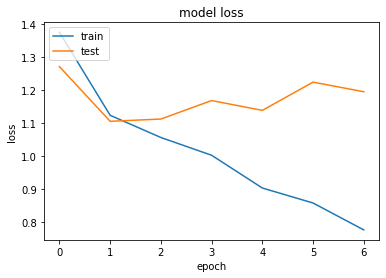

In [21]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

58/58 - 0s - loss: 1.1056 - accuracy: 0.5794
score: 1.11
acc: 0.58


In [23]:
# load labels
with open('./Data_Array_Storage/labels_mfcc40_emo_0dn_us.pkl', 'rb') as f:
    lb = pickle.load(f)

In [24]:
# error analysis

preds = model.predict(X_test, 
                         batch_size=batch_size, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

58/58 [==============================] - 0s 2ms/step


array([0, 0, 0, 4, 0, 6, 0, 5, 6, 5, 5, 3, 1, 0, 4, 2, 1, 0, 1, 5, 1, 6,
       4, 6, 4, 1, 3, 2, 6, 6, 6, 0, 6, 0, 3, 1, 6, 6, 4, 1, 5, 0, 5, 4,
       6, 0, 5, 1, 0, 4, 6, 5, 0, 1, 3, 0, 0, 6, 6, 4, 3, 3, 0, 3, 2, 4,
       3, 0, 2, 6, 4, 4, 0, 0, 2, 1, 2, 4, 4, 1, 0, 0, 4, 1, 6, 2, 5, 0,
       4, 6, 3, 1, 2, 1, 4, 0, 2, 6, 4, 4, 3, 6, 0, 0, 0, 4, 5, 6, 0, 4,
       5, 2, 4, 0, 0, 4, 4, 0, 3, 4, 1, 4, 0, 0, 5, 1, 3, 0, 5, 0, 2, 6,
       6, 2, 3, 0, 1, 1, 2, 0, 0, 3, 6, 6, 0, 6, 6, 2, 1, 6, 5, 5, 0, 5,
       0, 2, 1, 6, 5, 6, 6, 3, 1, 5, 1, 1, 3, 1, 4, 0, 6, 4, 5, 5, 4, 0,
       6, 3, 1, 2, 2, 0, 3, 1, 5, 2, 1, 5, 4, 5, 0, 0, 5, 0, 1, 5, 0, 5,
       0, 6, 3, 4, 2, 4, 0, 4, 0, 0, 6, 6, 6, 1, 4, 2, 0, 0, 6, 4, 4, 3,
       6, 0, 4, 6, 6, 6, 0, 4, 4, 5, 6, 5, 5, 0, 3, 5, 4, 5, 5, 2, 3, 4,
       6, 0, 0, 4, 5, 2, 5, 5, 4, 6, 1, 0, 2, 1, 0, 0, 0, 3, 0, 0, 3, 3,
       0, 4, 6, 6, 0, 0, 3, 3, 4, 6, 1, 1, 3, 1, 4, 5, 5, 2, 1, 1, 2, 2,
       0, 4, 4, 6, 3, 0, 1, 4, 1, 2, 4, 2, 6, 5, 4,

In [25]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[150:180]

,actualvalues,predictedvalues
150,fear,sad
151,neutral,sad
152,angry,angry
153,disgust,sad
154,fear,angry
155,angry,fear
156,disgust,disgust
157,surprise,surprise
158,sad,sad
159,surprise,surprise


In [26]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.579408543263965


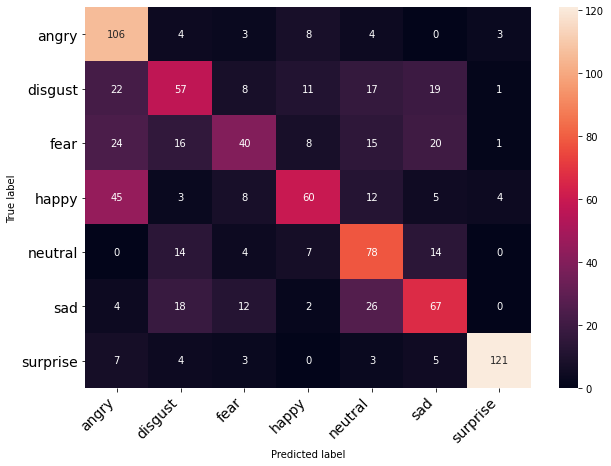

In [27]:
# Get the predictions file 
# finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [28]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.51      0.83      0.63       128
     disgust       0.49      0.42      0.45       135
        fear       0.51      0.32      0.40       124
       happy       0.62      0.44      0.52       137
     neutral       0.50      0.67      0.57       117
         sad       0.52      0.52      0.52       129
    surprise       0.93      0.85      0.89       143

    accuracy                           0.58       913
   macro avg       0.58      0.58      0.57       913
weighted avg       0.59      0.58      0.57       913

